# **Correlating Random Variables - Cholesky Decomposition**

$\Sigma = \mathbb{E}\left[(x - \mathbb{E}[x])(x - \mathbb{E}[x])^T\right]$

<!---For a 2-d case, we have x = $(x_1, x_2)$ and therefore

$\Sigma = \mathbb{E}\left[\begin{pmatrix} 
a & b \\
c & d 
\end{pmatrix}\right]$-->



In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.interpolate

plt.rcParams['font.size'] = 15

## Example - Bivariate Gaussian

### Joint Distribution $P(x_1, x_2)$

Text(0,0.5,u'$x_2$')

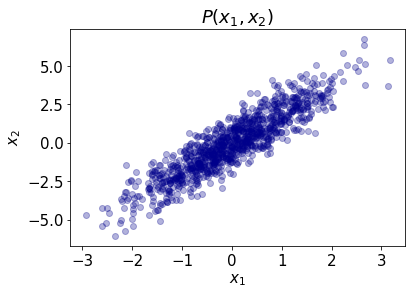

In [185]:
samples = np.random.multivariate_normal([0,0], [[1, 1.8], [1.8, 4]], size=1000)
fig, ax = plt.subplots()
ax.scatter(samples[:,0], samples[:,1], alpha=.3, c='darkblue')
ax.set_title("$P(x_1, x_2)$")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

In [190]:
cov = np.cov(samples.T)
print cov

[[0.98934173 1.81932307]
 [1.81932307 4.0980562 ]]


In [191]:
L = np.linalg.cholesky(cov)

### Marginal Distributions $P(x_1)$, $P(x_2)$

Text(0.5,0,u'$x_2$')

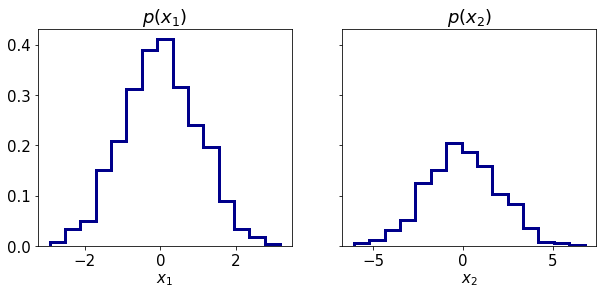

In [192]:
fig, axs = plt.subplots(1, 2, sharey='all', figsize=(10, 4))
axs[0].hist(samples[:, 0], color='darkblue', histtype='step', lw=3, bins=15, normed=1)
axs[0].set_title("$p(x_1)$")
axs[0].set_xlabel("$x_1$")

axs[1].hist(samples[:, 1], color='darkblue', histtype='step', lw=3, bins=15, normed=1)
axs[1].set_title("$p(x_2$)")
axs[1].set_xlabel("$x_2$")


Text(0,0.5,u'$x_2$')

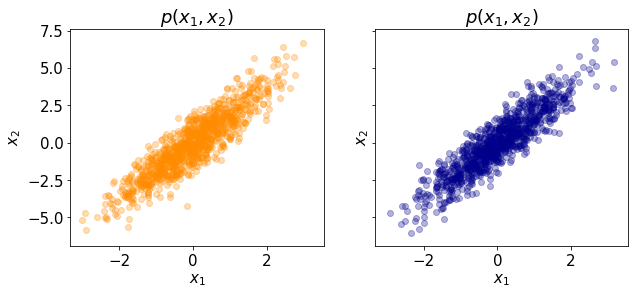

In [198]:
generated = L.dot(np.random.normal(size=(2, 1000))).T

fig, axs = plt.subplots(1, 2, sharey='all', sharex='all', figsize=(10, 4))
axs[0].scatter(generated[:,0], generated[:, 1], alpha=.3, c='darkorange')
axs[0].set_title("$p(x_1, x_2)$")
axs[0].set_xlabel("$x_1$")
axs[0].set_ylabel("$x_2$")

axs[1].scatter(samples[:,0], samples[:, 1], alpha=.3, c='darkblue')
axs[1].set_title("$p(x_1, x_2$)")
axs[1].set_xlabel("$x_1$")
axs[1].set_ylabel("$x_2$")

## Example - Circular Distribution

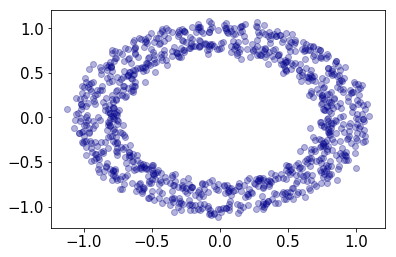

In [303]:
circles = datasets.make_circles(1000, noise=0.05)[0]
plt.scatter(circles[:, 0], circles[:,1], alpha=.3, c='darkblue')
ax.set_title("$P(x_1, x_2)$")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

In [304]:
cov = np.cov(circles.T)
cov

array([[ 0.41477216, -0.00056654],
       [-0.00056654,  0.41428106]])

In [305]:
L = np.linalg.cholesky(cov)

Text(0.5,1,u'$p(x_2$)')

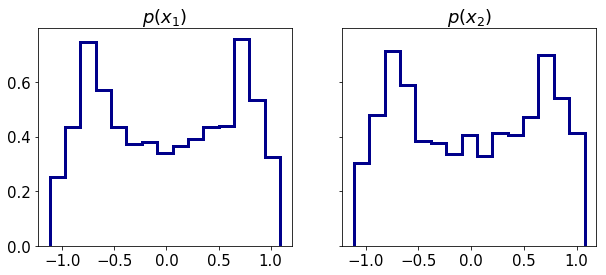

In [306]:
fig, axs = plt.subplots(1, 2, sharey='all', figsize=(10, 4))
h_1 = axs[0].hist(circles[:, 0], color='darkblue', histtype='step', lw=3, bins=15, normed=1)
axs[0].set_title("$p(x_1)$")
h_2 = axs[1].hist(circles[:, 1], color='darkblue', histtype='step', lw=3, bins=15, normed=1)
axs[1].set_title("$p(x_2$)")

## Inverse Transform Sampling

Text(0.5,1,u'$p(x_2$)')

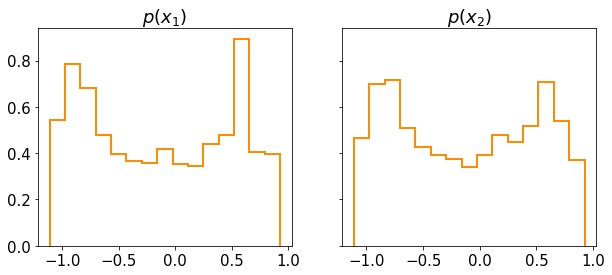

In [307]:
cdf_1 = h_1[0].cumsum() / h_1[0].sum()
cdf_2 = h_2[0].cumsum() / h_2[0].sum()

inverse_transform_h1 = scipy.interpolate.interp1d(cdf_1, h_1[1][:-1])
inverse_transform_h2 = scipy.interpolate.interp1d(cdf_2, h_2[1][:-1])

fig, axs = plt.subplots(1, 2, sharey='all', figsize=(10, 4))

axs[0].hist(inverse_transform_h1(np.random.uniform(cdf_1.min(), cdf_1.max(), 1000)), histtype='step', bins=15, normed=1, color='darkorange', lw=2)
axs[0].set_title("$p(x_1$)")

axs[1].hist(inverse_transform_h2(np.random.uniform(cdf_2.min(), cdf_2.max(), 1000)), histtype='step', bins=15, normed=1, color='darkorange', lw=2)
axs[1].set_title("$p(x_2$)")

In [308]:
h_1_generated = inverse_transform_h1(np.random.uniform(cdf_1.min(), cdf_1.max(), 1000))
h_2_generated = inverse_transform_h2(np.random.uniform(cdf_2.min(), cdf_2.max(), 1000))

samples = np.vstack((h_1_generated, h_2_generated)).T

Text(0.5,1,u'$p(x_1, x_2)$')

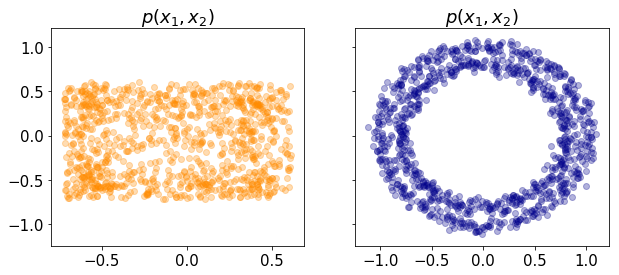

In [309]:
generated = L.dot(samples.T).T

fig, axs = plt.subplots(1, 2, sharey='all', figsize=(10, 4))
axs[0].scatter(generated[:,0], generated[:, 1], alpha=.3, c='darkorange')
axs[0].set_title("$p(x_1, x_2)$")
axs[1].scatter(circles[:,0], circles[:, 1], alpha=.3, c='darkblue')
axs[1].set_title("$p(x_1, x_2)$")